In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analysis_functions import Analysis

In [2]:
uqc_100_path = "../../results/acrobot_testing/4qubit_uqc_100"
uqc_250_path = "../../results/acrobot_testing/4qubit_uqc_250"
uqc_500_path = "../../results/acrobot_testing/4qubit_uqc_500"
uqc_1000_path = "../../results/acrobot_testing/4qubit_uqc"

uqc_100 = Analysis(uqc_100_path)
uqc_250 = Analysis(uqc_250_path)
uqc_500 = Analysis(uqc_500_path)
uqc_1000 = Analysis(uqc_1000_path)

In [4]:
uqc_100_return = uqc_100.get_rewards()
uqc_250_return = uqc_250.get_rewards()
uqc_500_return = uqc_500.get_rewards()
uqc_1000_return = uqc_1000.get_rewards()

uqc_100_mean = np.mean(uqc_100_return, axis=0)
uqc_250_mean = np.mean(uqc_250_return, axis=0)
uqc_500_mean = np.mean(uqc_500_return, axis=0)
uqc_1000_mean = np.mean(uqc_1000_return, axis=0)

uqc_100_std = np.std(uqc_100_return, axis=0)
uqc_250_std = np.std(uqc_250_return, axis=0)
uqc_500_std = np.std(uqc_500_return, axis=0)
uqc_1000_std = np.std(uqc_1000_return, axis=0)

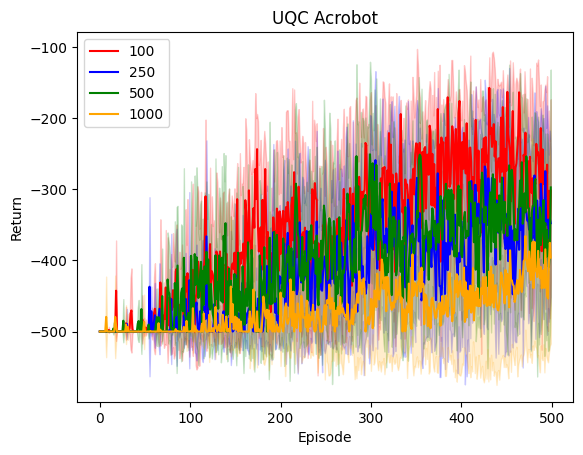

In [5]:
plt.plot(uqc_100_mean,color = "red", label="100")
plt.fill_between(range(len(uqc_100_mean)), uqc_100_mean-uqc_100_std, uqc_100_mean+uqc_100_std, alpha=0.2, color="red")
plt.plot(uqc_250_mean,color = "blue", label="250")
plt.fill_between(range(len(uqc_250_mean)), uqc_250_mean-uqc_250_std, uqc_250_mean+uqc_250_std, alpha=0.2, color="blue")
plt.plot(uqc_500_mean,color = "green", label="500")
plt.fill_between(range(len(uqc_500_mean)), uqc_500_mean-uqc_500_std, uqc_500_mean+uqc_500_std, alpha=0.2, color="green")
plt.plot(uqc_1000_mean,color = "orange", label="1000")
plt.fill_between(range(len(uqc_1000_mean)), uqc_1000_mean-uqc_1000_std, uqc_1000_mean+uqc_1000_std, alpha=0.2, color="orange")
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("UQC Acrobot")
plt.show()

In [7]:
uqc_100_mean_gradients, uqc_100_mean_variance, uqc_100_max, uqc_100_index_mas, uqc_100_min, uqc_100_index_min = uqc_100.calculate_mean_variance_gradients(return_max = True, return_min = True)

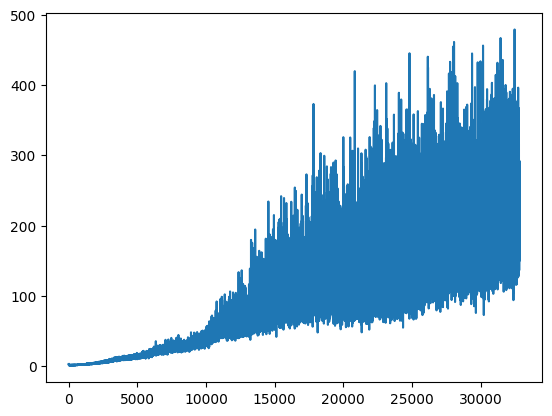

In [9]:
plt.plot(uqc_100_mean_gradients, label="100")